# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds



,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [18]:
# TODO
most_expensive_house = ds.loc[ds["price"].idxmax()]
address = most_expensive_house['address']
price = most_expensive_house['price']
print(f"The house with adress {address}is the most expensive and its price is {price} USD")

The house with adress El Escorialis the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [19]:
# TODO
most_expensive_house = ds.loc[ds["price"].idxmin()]
address = most_expensive_house['address']
price = most_expensive_house['price']
print(f"The house with adress {address}is the cheapest and its price is {price} USD")

The house with adress Parlais the cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [20]:
# TODO
biggest_house = ds.loc[ds["surface"].idxmax()]
biggest_address = biggest_house["address"]
biggest_surface = biggest_house["surface"]

smallest_house = ds.loc[ds["surface"].idxmin()]
smallest_address = smallest_house["address"]
smallest_surface = smallest_house["surface"]

print(f"The biggest house is olcated on {biggest_address} and its surface is {biggest_surface} meters")
print(f"The smallest house is olcated on {smallest_address} and its surface is {smallest_surface} meters")




The biggest house is olcated on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is olcated on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [21]:
# TODO

columna = ds["level5"]
population = ",".join(columna)
print(population)

Arganda del Rey,Fuenlabrada,Boadilla del Monte,Fuenlabrada,Arganda del Rey,Las Rozas de Madrid,Las Rozas de Madrid,Las Rozas de Madrid,Las Rozas de Madrid, Madrid Capital, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero, Madrid Capital, Madrid Capital, Madrid Capital,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes, Madrid Capital,Rivas-vaciamadrid,Alpedrete, Madrid Capital, Madrid Capital, Madrid Capital,Móstoles, Madrid Capital, Madrid Capital, Madrid Capital,San Fernando de Henares,Coslada, Madrid Capital,Becerril de la Sierra, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital,Alcalá de Henares, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital,Pinto, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Capital, Madrid Ca

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [22]:
# TODO
contain_nas = ds.isna().any().any()

if contain_nas:
    column_with_nas = ds.columns[ds.isna().any()].tolist()
    print(f"column with nas:{column_with_nas}")

    rows_with_nas=ds[ds.isna().any(axis=1)]
    print(rows_with_nas)


column with nas:['realEstate_name', 'phone_realEstate', 'rooms', 'bathrooms', 'surface', 'description', 'level4', 'level6', 'level7', 'level8', 'zipCode', 'customZone']
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False 

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [23]:
original_shape = ds.shape

ds_clean = ds.dropna()

clean_shape = ds_clean.shape

# Imprimir la comparación de las dimensiones
print(f"Original DataFrame dimensions: {original_shape}")
print(f"DataFrame dimensions after NA deletion: {clean_shape}")

Original DataFrame dimensions: (15335, 37)
DataFrame dimensions after NA deletion: (0, 37)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [24]:
# TODO

filtered_ds = ds[ds['level5'] == "Arroyomolinos (Madrid)"]

mean_price = filtered_ds['price'].mean()

# Imprimir el valor obtenido
print(f"The mean price in Arroyomolinos (Madrid) is {mean_price}")

The mean price in Arroyomolinos (Madrid) is 294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

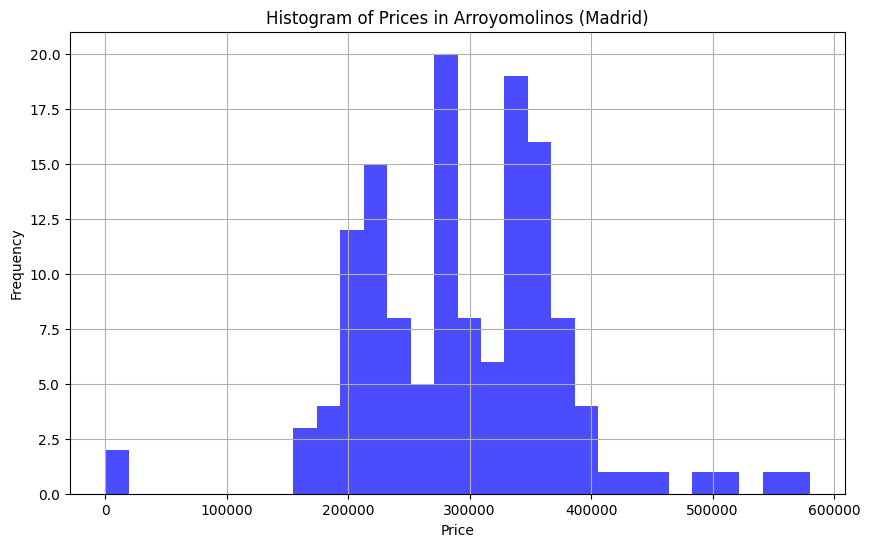

In [25]:
# TODO: Code

filtered_ds = ds[ds["level5"]=="Arroyomolinos (Madrid)"]
plt.figure(figsize=(10, 6))
plt.hist(filtered_ds['price'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Prices in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [26]:
# TODO

filtered_valdemorillo = ds[ds["level5"]=="Valdemorillo"]
mean_valdemorillo = filtered_valdemorillo["price"].mean()


filtered_galapagar = ds[ds["level5"]=="Galapagar"]
mean_galapagar = filtered_galapagar["price"].mean()

print(f"The average price in Valdemorillo is {mean_valdemorillo}")
print(f"The average price in Valdemorillo is {mean_galapagar}")

The average price in Valdemorillo is 363860.2931034483
The average price in Valdemorillo is 360063.20238095237


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [27]:
# TODO


ds["PPM"] = ds["price"]/ds["surface"]


filtered_valdemorillo = ds[ds["level5"]=="Valdemorillo"]
mean_valdemorillo = filtered_valdemorillo["PPM"].mean()


filtered_galapagar = ds[ds["level5"]=="Galapagar"]
mean_galapagar = filtered_galapagar["PPM"].mean()

print(f"The average price in Valdemorillo is {mean_valdemorillo}")
print(f"The average price in Valdemorillo is {mean_galapagar}")

The average price in Valdemorillo is 1317.9502109024986
The average price in Valdemorillo is 1606.3240303094024


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

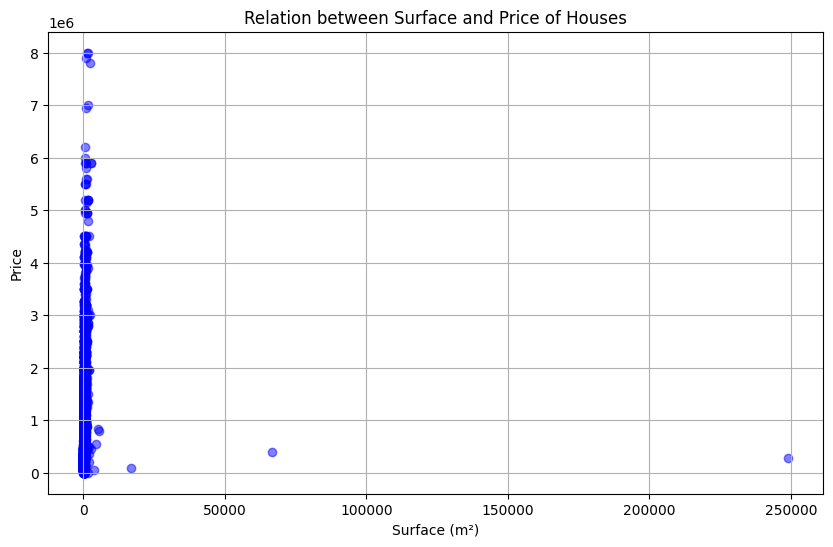

In [28]:
# TODO: Code

import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.5, c='blue')
plt.xlabel('Surface (m²)')
plt.ylabel('Price')
plt.title('Relation between Surface and Price of Houses')
plt.grid(True)
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

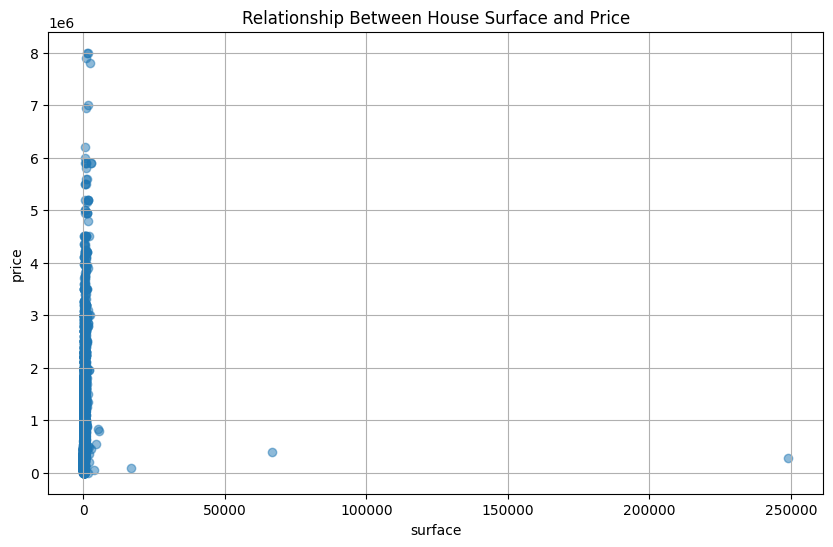

In [29]:
# TODO

plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.5)
plt.title('Relationship Between House Surface and Price')
plt.xlabel('surface')
plt.ylabel('price')
plt.grid(True)
plt.show()

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [30]:
# TODO

counts = ds["level5"].value_counts()
counts_max = counts.idxmax()

print(counts_max)


 Madrid Capital


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [31]:
# TODO

south_belt_populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

south_belt_df = ds[ds['level5'].isin(south_belt_populations)]

print(south_belt_df.head())

     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   price  ... level5Id level6Id level7Id  \
1     

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

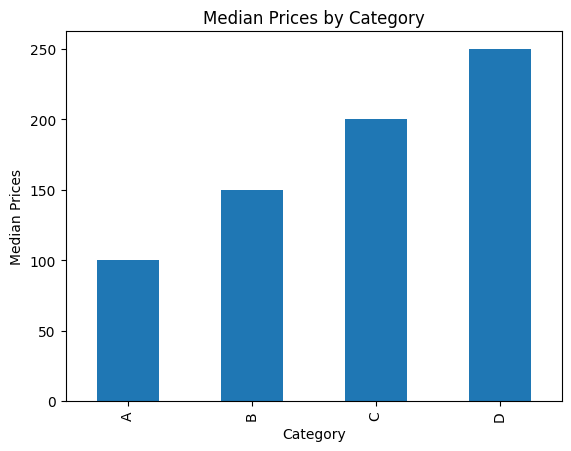

In [32]:
# TODO: Code

# Supongamos que subset_df es el DataFrame obtenido en el ejercicio 14 y tiene una columna 'prices'
# Ejemplo de DataFrame
data = {
    'category': ['A', 'B', 'C', 'D'],
    'prices': [100, 150, 200, 250]
}
subset_df = pd.DataFrame(data)

# Calcular la mediana de los precios por categoría (o cualquier otra agrupación relevante)
median_prices = subset_df.groupby('category')['prices'].median()

# Crear un gráfico de barras
median_prices.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Median Prices')
plt.title('Median Prices by Category')
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [33]:
# TODO

mean_price = south_belt_df['price'].mean()
variance_price = south_belt_df['price'].var()


mean_rooms = south_belt_df['rooms'].mean()
variance_rooms = south_belt_df['rooms'].var()


mean_surface = south_belt_df['surface'].mean()
variance_surface = south_belt_df['surface'].var()


mean_bathrooms = south_belt_df['bathrooms'].mean()
variance_bathrooms = south_belt_df['bathrooms'].var()


print(f"Price - Mean: {mean_price}, Variance: {variance_price}")
print(f"Rooms - Mean: {mean_rooms}, Variance: {variance_rooms}")
print(f"Surface - Mean: {mean_surface}, Variance: {variance_surface}")
print(f"Bathrooms - Mean: {mean_bathrooms}, Variance: {variance_bathrooms}")

Price - Mean: 223094.48070562293, Variance: 14921367508.04902
Rooms - Mean: 3.0177383592017737, Variance: 0.7188858892927542
Surface - Mean: 111.75222363405337, Variance: 4263.051760316337
Bathrooms - Mean: 1.633221850613155, Variance: 0.5717968625577321


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [34]:
# TODO

# Subconjunto de datos del Ejercicio 14: propiedades nuevas
subset_df = ds[ds['isNew'] == True]

# Encontrar la casa más cara en cada población
most_expensive_houses = subset_df.loc[subset_df.groupby('level4')['price'].idxmax()]

# Seleccionar las columnas relevantes: dirección y precio
result = most_expensive_houses[['address', 'price']]

# Mostrar el resultado
result

,address,price
935,Alcalá de Henares,240000
1441,"Calle Calle Quejigo, Alcobendas",750000
1438,"Calle Calle Princesa Doña Sofía, Alcorcón",450000
943,"Calle España, Ciempozuelos",97000
5331,"Calle Mirador de Despeñaperros, 27, Collado Vi...",350000
1134,Colmenar Viejo,350000
2271,"Calle de Gabriel Celaya, 47, Coslada",470000
1098,El Álamo,210000
2293,Fuenlabrada,226000
1436,"Calle Calle Madrid, Getafe",400000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

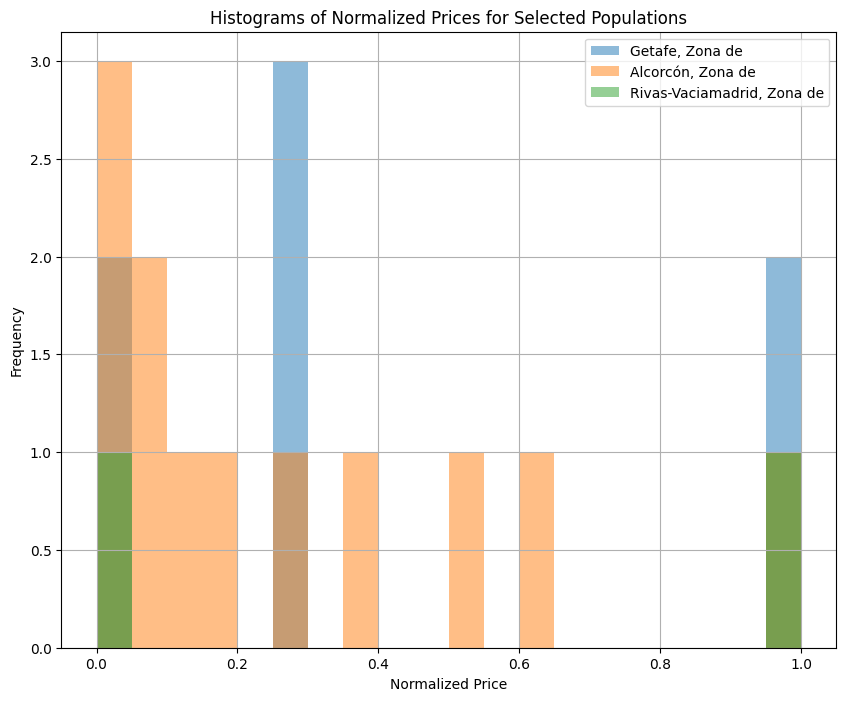

In [35]:
# TODO

# Subconjunto de datos del Ejercicio 14: propiedades nuevas
subset_df = ds[ds['isNew'] == True]

# Eliminar filas con valores NaN en la columna de precios
subset_df = subset_df.dropna(subset=['price'])

# Seleccionar cuatro poblaciones para el análisis
selected_populations = subset_df['level4'].dropna().unique()[:4]

# Normalizar los precios para cada población
normalized_prices = {}
for population in selected_populations:
    population_data = subset_df[subset_df['level4'] == population]
    if not population_data.empty:
        min_price = population_data['price'].min()
        max_price = population_data['price'].max()
        if min_price != max_price:  # Asegurarse de que no haya un rango cero
            normalized_prices[population] = (population_data['price'] - min_price) / (max_price - min_price)

# Crear el gráfico de histogramas
plt.figure(figsize=(10, 8))

for population in normalized_prices:
    plt.hist(normalized_prices[population], bins=20, alpha=0.5, label=population)

plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Histograms of Normalized Prices for Selected Populations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [37]:
# TODO

# Asegúrate de que 'ds' esté definido y cargado correctamente
# ds = pd.read_csv('your_data_file.csv')  # Ajusta esto según cómo cargas tu DataFrame

# Subconjunto de datos del Ejercicio 14: propiedades nuevas
subset_df = ds[ds['isNew'] == True]

# Eliminar filas con valores NaN en las columnas de precio y superficie
subset_df = subset_df.dropna(subset=['price', 'surface'])

# Crear la columna pps (price per square meter)
subset_df['pps'] = subset_df['price'] / subset_df['surface']

# Verificar cuántos registros hay para Getafe y Alcorcón
getafe_count = subset_df[subset_df['level4'] == 'Getafe'].shape[0]
alcorcon_count = subset_df[subset_df['level4'] == 'Alcorcón'].shape[0]

# Si no hay registros suficientes para Getafe y Alcorcón, usar otras ciudades
if getafe_count == 0 or alcorcon_count == 0:
    # Filtrar los datos para las nuevas ciudades seleccionadas
    alcala_df = ds[ds['level4'] == 'Alcalá de Henares, Zona de']
    las_rozas_df = ds[ds['level4'] == 'Las Rozas de Madrid, Zona de']

    # Eliminar filas con valores NaN en las columnas de precio y superficie
    alcala_df = alcala_df.dropna(subset=['price', 'surface'])
    las_rozas_df = las_rozas_df.dropna(subset=['price', 'surface'])

    # Crear la columna pps (price per square meter)
    alcala_df['pps'] = alcala_df['price'] / alcala_df['surface']
    las_rozas_df['pps'] = las_rozas_df['price'] / las_rozas_df['surface']

    # Calcular estadísticas descriptivas para pps en cada ciudad
    alcala_pps_stats = alcala_df['pps'].describe()
    las_rozas_pps_stats = las_rozas_df['pps'].describe()

    # Mostrar las estadísticas descriptivas
    print("Estadísticas de Alcalá de Henares, Zona de:")
    print(alcala_pps_stats)
    print("\nEstadísticas de Las Rozas de Madrid, Zona de:")
    print(las_rozas_pps_stats)
else:
    # Filtrar los datos para las ciudades de Getafe y Alcorcón
    getafe_df = subset_df[subset_df['level4'] == 'Getafe']
    alcorcon_df = subset_df[subset_df['level4'] == 'Alcorcón']

    # Calcular estadísticas descriptivas para pps en cada ciudad
    getafe_pps_stats = getafe_df['pps'].describe()
    alcorcon_pps_stats = alcorcon_df['pps'].describe()

    # Mostrar las estadísticas descriptivas
    print("Estadísticas de Getafe:")
    print(getafe_pps_stats)
    print("\nEstadísticas de Alcorcón:")
    print(alcorcon_pps_stats)

Estadísticas de Alcalá de Henares, Zona de:
count     499.000000
mean     2119.301400
std       639.054127
min       655.963303
25%      1585.824561
50%      2003.181102
75%      2699.047619
max      5133.333333
Name: pps, dtype: float64

Estadísticas de Las Rozas de Madrid, Zona de:
count     373.000000
mean     2403.104518
std       871.996199
min       639.737991
25%      1749.116608
50%      2243.243243
75%      3000.000000
max      5511.363636
Name: pps, dtype: float64


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

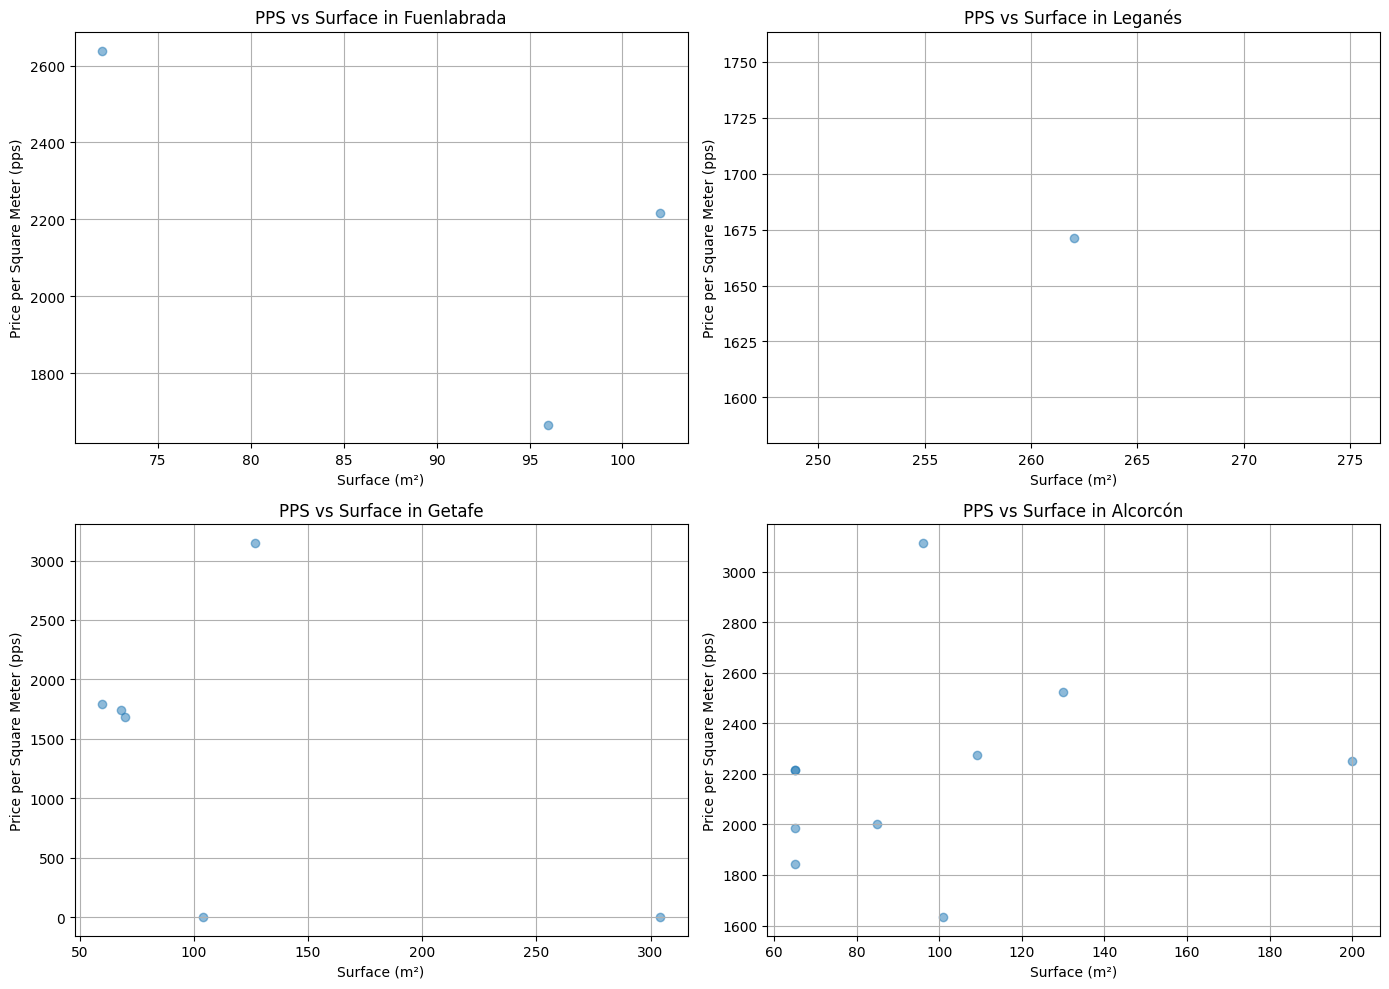

In [38]:
# TODO

# Asegúrate de que 'ds' esté definido y cargado correctamente
# ds = pd.read_csv('your_data_file.csv')  # Ajusta esto según cómo cargas tu DataFrame

# Subconjunto de datos del Ejercicio 14: propiedades nuevas
subset_df = ds[ds['isNew'] == True]

# Eliminar filas con valores NaN en las columnas de precio y superficie
subset_df = subset_df.dropna(subset=['price', 'surface'])

# Crear la columna pps (price per square meter)
subset_df['pps'] = subset_df['price'] / subset_df['surface']

# Seleccionar las poblaciones
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
subset_dfs = {pop: subset_df[subset_df['level5'] == pop] for pop in populations}

# Crear los subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot para cada población
for ax, (pop, data) in zip(axs.ravel(), subset_dfs.items()):
    ax.scatter(data['surface'], data['pps'], alpha=0.5)
    ax.set_title(f'PPS vs Surface in {pop}')
    ax.set_xlabel('Surface (m²)')
    ax.set_ylabel('Price per Square Meter (pps)')
    ax.grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
